In [44]:
# import libraries to import, operate and visualize the data.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime,date
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [45]:
# loading the transactions data from Transactions sheet on Raw_data excel file.
trans = pd.read_excel("Raw_data.xlsx", sheet_name= "Transactions")

In [46]:
# checking first 5 rows using .head() from transactions Data.
trans.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [47]:
# information of the columns and data-types of transactions data.
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [48]:
trans.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951,38199.776549
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660,2875.201110
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000,35667.000000
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000,38216.000000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000,40672.000000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000,42710.000000


In [49]:
trans.describe(include= 'object')

,order_status,brand,product_line,product_class,product_size
count,20000,19803,19803,19803,19803
unique,2,6,4,3,3
top,Approved,Solex,Standard,medium,medium
freq,19821,4253,14176,13826,12990


In [50]:
print("total rows(records) in the dataset: {}".format(trans.shape[0]))
print("total columns(features) in the dataset: {}".format(trans.shape[1]))

total rows(records) in the dataset: 20000
total columns(features) in the dataset: 13


In [51]:
# check for columns with numeric and non-numeric values.

#numeric columns
df_numeric = trans.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print("The numeric columns are :")
print(numeric_cols)

The numeric columns are :
['transaction_id' 'product_id' 'customer_id' 'online_order' 'list_price'
 'standard_cost' 'product_first_sold_date']


In [52]:
#non-numeric columns.
df_non_numeric = trans.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print("The non-numeric columns are :")
print(non_numeric_cols)

The non-numeric columns are :
['transaction_date' 'order_status' 'brand' 'product_line' 'product_class'
 'product_size']


#1. Check for Missing Values

In [53]:
trans.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [54]:
# percent of missing values
trans.isnull().mean()*100

transaction_id             0.000
product_id                 0.000
customer_id                0.000
transaction_date           0.000
online_order               1.800
order_status               0.000
brand                      0.985
product_line               0.985
product_class              0.985
product_size               0.985
list_price                 0.000
standard_cost              0.985
product_first_sold_date    0.985
dtype: float64

<Axes: >

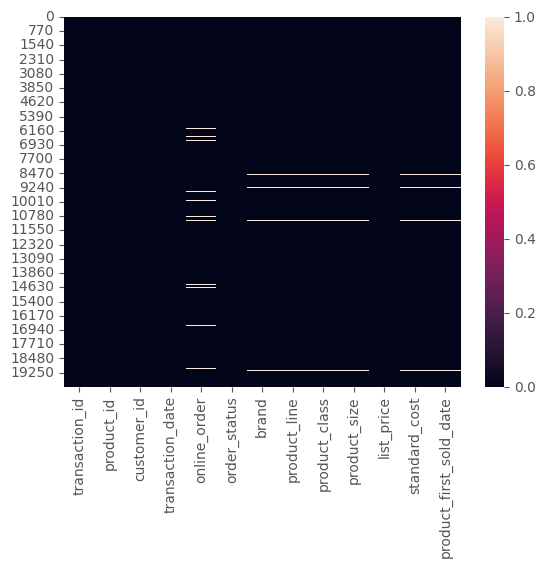

In [55]:
sns.heatmap(trans.isnull())

##1.1 Online Order

Since 1.8% of the records have online_order data missing we can perform mode imputation for this categorical column

In [56]:
trans[trans['online_order'].isnull()]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
97,98,49,333,2017-06-23,NaN,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,37823.0
166,167,90,3177,2017-04-26,NaN,Approved,Norco Bicycles,Standard,low,medium,363.01,290.41,38482.0
169,170,6,404,2017-10-16,NaN,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,37838.0
250,251,63,1967,2017-04-11,NaN,Approved,Solex,Standard,medium,medium,1483.20,99.59,42145.0
300,301,78,2530,2017-03-24,NaN,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,35455.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19514,19515,51,690,2017-01-22,NaN,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0
19573,19574,18,1735,2017-01-15,NaN,Approved,Solex,Standard,medium,medium,575.27,431.45,41345.0
19580,19581,49,1933,2017-10-12,NaN,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,41064.0
19635,19636,98,1389,2017-07-26,NaN,Approved,Trek Bicycles,Standard,high,medium,358.39,215.03,38002.0


In [57]:
most_freq_online_mode = trans['online_order'].mode() [0]
most_freq_online_mode

1.0

In [58]:
trans['online_order'].fillna(most_freq_online_mode, inplace=True)

In [59]:
trans['online_order'].isnull().sum()

0

##1.2 Brand, product_line, product_class, product_size

In [60]:
#Set option to view all results
#pd.set_option("display.max_rows", None, "display.max_columns", None)

In [61]:
#Set option to view default results
#pd.set_option("display.max_rows", 10, "display.max_columns", None)

In [62]:
#Fetching records where Brand is missing.
trans[trans['brand'].isnull()]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
136,137,0,431,2017-09-23,0.0,Approved,NaN,NaN,NaN,NaN,1942.61,NaN,NaN
159,160,0,3300,2017-08-27,0.0,Approved,NaN,NaN,NaN,NaN,1656.86,NaN,NaN
366,367,0,1614,2017-03-10,0.0,Approved,NaN,NaN,NaN,NaN,850.89,NaN,NaN
406,407,0,2559,2017-06-14,1.0,Approved,NaN,NaN,NaN,NaN,710.59,NaN,NaN
676,677,0,2609,2017-07-02,0.0,Approved,NaN,NaN,NaN,NaN,1972.01,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19340,19341,0,443,2017-12-26,1.0,Approved,NaN,NaN,NaN,NaN,744.54,NaN,NaN
19383,19384,0,2407,2017-06-11,0.0,Approved,NaN,NaN,NaN,NaN,1098.18,NaN,NaN
19793,19794,0,2860,2017-01-13,0.0,Approved,NaN,NaN,NaN,NaN,868.56,NaN,NaN
19859,19860,0,2468,2017-06-24,1.0,Approved,NaN,NaN,NaN,NaN,1497.43,NaN,NaN


In [63]:
trans[trans['brand'].isnull()][['brand', 'product_line', 'product_class', 'product_size', 'standard_cost', 'product_first_sold_date']].shape[0]

197

It is clear from the check that when brand is null, all other column values with missing values visualise 'product_line', 'product_class', 'product_size', 'standard_cost', 'product_first_sold_date' are also null. These null values comprise 1% of the dataset, hence we can drop these rows/records.

In [64]:
records_to_drop= trans[trans['brand'].isnull()].index
records_to_drop

Int64Index([  136,   159,   366,   406,   676,   780,  1003,  1130,  1196,
             1282,
            ...
            19045, 19132, 19176, 19196, 19205, 19340, 19383, 19793, 19859,
            19871],
           dtype='int64', length=197)

In [65]:
trans.drop(index= records_to_drop, axis=0, inplace= True)

#or

#trans[trans['brand'].isnull()][['brand', 'product_line', 'product_class', 'product_size', 'standard_cost', 'product_first_sold_date']].drop_duplicates()

In [66]:
trans.isnull().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

In [67]:
print("total rows(records) after removing the missing values: {}".format(trans.shape[0]))
print("total columns(features) after removing the missing values: {}".format(trans.shape[1]))

total rows(records) after removing the missing values: 19803
total columns(features) after removing the missing values: 13


#2. Inconsistency Check

Now checking if there is inconsistent data/typo error present in the categorical columns. The columns to be checked are 'online_order', 'order_status', 'product_line', 'product_class', 'product_first_sold_date' and 'brand'.

In [68]:
trans['online_order'].value_counts()

1.0    10097
0.0     9706
Name: online_order, dtype: int64

In [69]:
trans['order_status'].value_counts()

Approved     19625
Cancelled      178
Name: order_status, dtype: int64

In [70]:
trans[['order_status', 'online_order']]

,order_status,online_order
0,Approved,0.0
1,Approved,1.0
2,Approved,0.0
3,Approved,0.0
4,Approved,1.0
...,...,...
19995,Approved,1.0
19996,Approved,1.0
19997,Approved,1.0
19998,Approved,0.0


In [71]:
trans[['order_status', 'online_order']].drop_duplicates()

,order_status,online_order
0,Approved,0.0
1,Approved,1.0
42,Cancelled,0.0
254,Cancelled,1.0


In [72]:
trans['product_line'].value_counts()

Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

In [73]:
trans['product_class'].value_counts()

medium    13826
high       3013
low        2964
Name: product_class, dtype: int64

In [74]:
trans['brand'].value_counts()

Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64

In [75]:
trans['product_first_sold_date']

0        41245.0
1        41701.0
2        36361.0
3        36145.0
4        42226.0
          ...   
19995    37823.0
19996    35560.0
19997    40410.0
19998    38216.0
19999    36334.0
Name: product_first_sold_date, Length: 19803, dtype: float64

In [76]:
#convert product first sold date into standard datetime format.
trans['product_first_sold_date']= pd.to_datetime(trans['product_first_sold_date'])

#3. Duplication Check

In [77]:
#Dropping the primary key column i.e. transaction_id and storing into a temporary dataframe
trans_dedupped = trans.drop('transaction_id', axis=1).drop_duplicates()

print("Number of records after removing Customer_id (pk), duplicates : {}".format(trans_dedupped.shape[0]))
print("Number of records in original dataset : {}".format(trans.shape[0]))

Number of records after removing Customer_id (pk), duplicates : 19803
Number of records in original dataset : 19803


Since both the numbers are same . There are no duplicate rows/records in the dataset

# 4. Outlier Check

<Axes: >

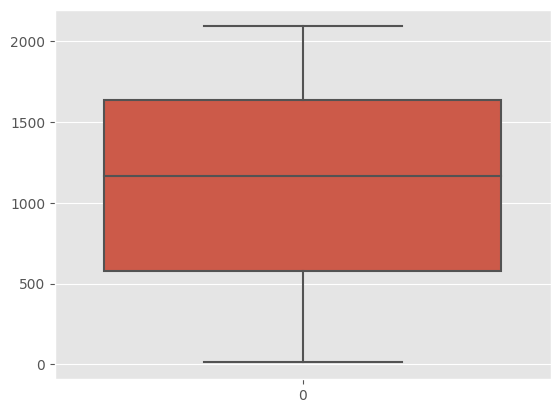

In [78]:
sns.boxplot(trans['list_price'])

<Axes: >

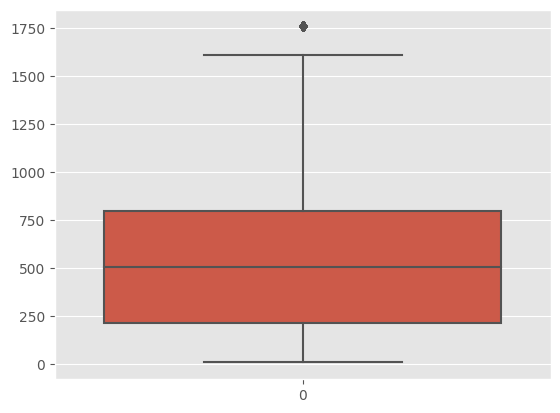

In [79]:
sns.boxplot(trans['standard_cost'])

It is clear from the graphs that there are no significant outliers.

# 5. Create a new feature 'Profit'

In [80]:
trans['Profit'] = trans['list_price']-trans['standard_cost']
trans['Profit']

0          17.87
1        1702.55
2        1544.61
3         817.36
4        1055.82
          ...   
19995     802.26
19996     104.24
19997    1592.19
19998      91.15
19999     195.34
Name: Profit, Length: 19803, dtype: float64

In [81]:
trans['Profit'].describe()

count    19803.000000
mean       551.950915
std        493.412849
min          4.800000
25%        133.780000
50%        445.210000
75%        830.240000
max       1702.550000
Name: Profit, dtype: float64

<Axes: xlabel='Profit', ylabel='Density'>

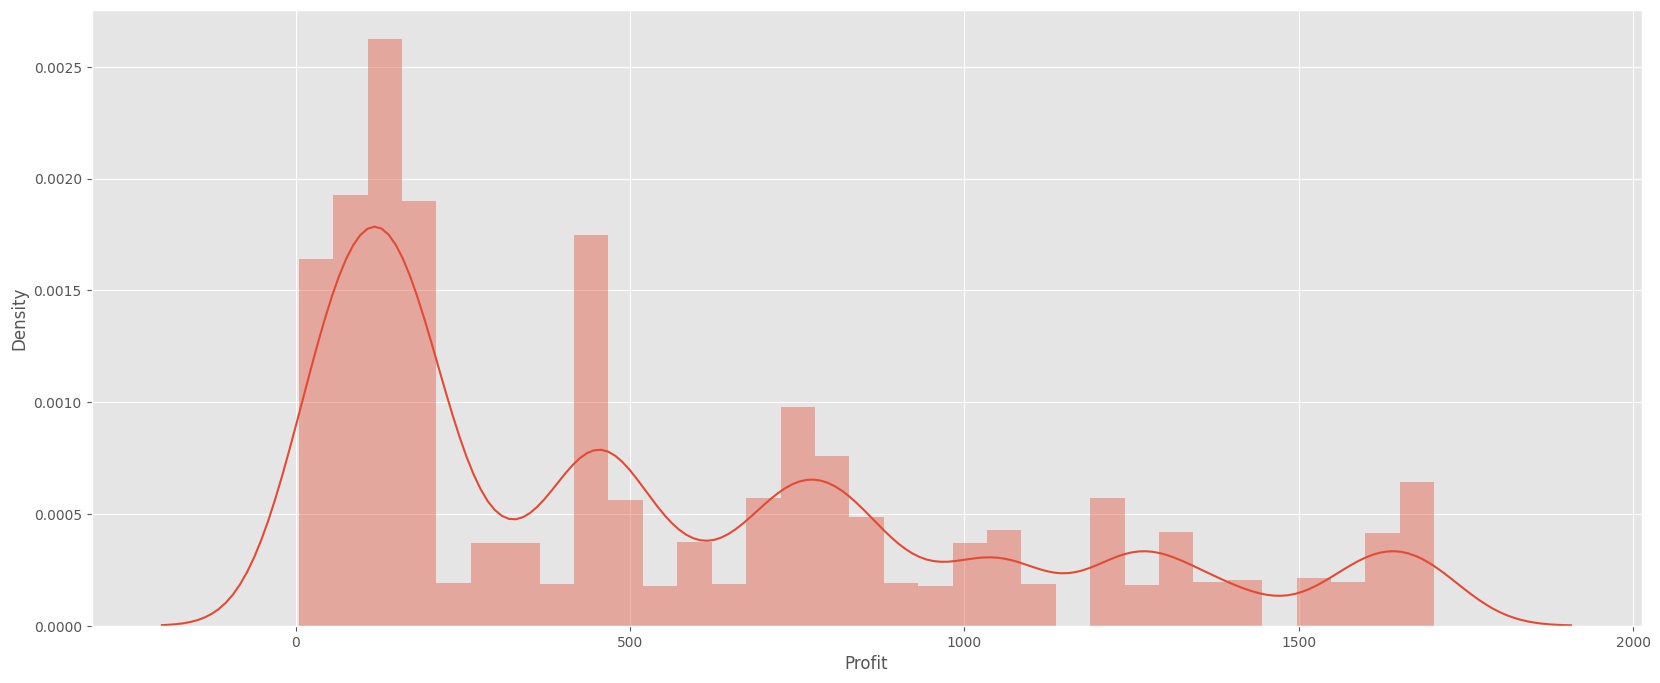

In [82]:
# distribution of profit column on graph
plt.figure(figsize=(20,8))
sns.distplot(trans['Profit'])

#6. Export cleaned transations dataset to csv

In [84]:
trans.to_csv('Transactions_cleaned.csv', index= False)